# AI Learning 06 - 2. 데이터 전처리

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
# 일반적으로 살펴보는게 비정상인 데이터가 들어가 있는 경우가 굉장히 많고, 우리는 이걸 찾아야 한다.
# 값이 없다거나, 값이 매우 크다거나, 음수이거나, 이런 데이터들을 하나하나 직접 봐주는 것이 정석이다.
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

## Missing data

In [6]:
# 여기서는 빠르게 확인하기 위해서 값이 빠진 애들이 있는지 먼저 확인해보도록 하자.
# isnull()을 호출하면 값이 None인 경우에 True를 반환한다.
# 이걸 summation을 해주면 column 별로 None값을 더해준다.
df_missing = df_train.isnull().sum()

In [7]:
df_missing

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
# 값이 많으므로 정렬시킨다.
df_missing = df_missing.sort_values(ascending=False)

In [9]:
# 정렬된 값을 50개 정도만 출력해보기
df_missing[:50]

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

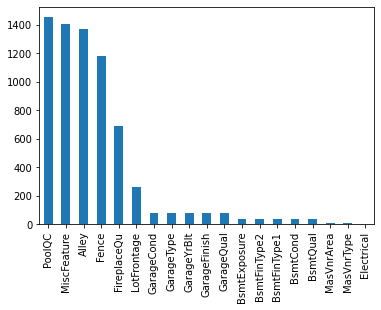

In [10]:
# missing이 하나 이상 있는 feature의 그래프
df_missing[df_missing > 0].plot.bar()

이때 우리가 접근할 수 있는 방법은 많다.<br>
missing data가 하나라도 있는 data는 제거한다 => 남는 데이터가 거의 없다.<br>
missing data가 하나라도 있는 column을 제거한다 => 이 방법을 선택함.<br><br>
현업에서는 최대한 많은 feature를 살리기 위해 missing의 개수가 적은 것들은 하나하나 확인하면서, 0이나 음수 값을 주는 등 임의로 값을 넣어준다.

In [11]:
# 여기서는 missing data가 하나라도 있는 feature를 제거함
# df_missing이 0 이상인 경우만 추린다.
df_missing = df_missing[df_missing > 0]

In [12]:
df_missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [13]:
# drop을 사용하여 missing data가 있는 feature를 제거한다.
# axis가 0이면 row, 1이면 column
df_train = df_train.drop(df_missing.index.tolist(), axis=1)

In [14]:
# 총 81개의 column 중에서 missing data가 있는 column은 사라지고 62개의 column만 남았다.
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [15]:
# missing data가 있는지 재확인
df_train.isnull().sum().max()

0

In [16]:
# numeric과 categorical feature를 분류함
numeric = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
numeric.remove('Id')
numeric.remove('SalePrice')

categorical = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [17]:
categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [18]:
numeric

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

## Categorical data

categorical한 데이터들을 점수형으로 바꿔주면 상관관계를 확인하는데 도움이 될 것이다.

In [19]:
# 빈 Data Frame을 하나 만든다.
df_order = pd.DataFrame()

In [20]:
feature_name = 'ExterQual'

In [21]:
df_train[feature_name].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [22]:
df_order['val'] = df_train[feature_name].unique()

In [23]:
df_order

,val
0,Gd
1,TA
2,Ex
3,Fa


In [24]:
# 각각의 val 자체를 index로 쓰기 위해 val를 index로 치환해준다.
df_order.index = df_order.val

In [25]:
# 각 클래스에 해당하는 집들만 다 뽑아서 평균을 내고 싶다.
# ex) Gd에 해당하는 data들의 평균을 낸다.
# groupby를 하는 것은 같은 애들끼리 그룹으로 묶겠다는 의미이다.
df_order['mean_price'] = df_train[[feature_name, 'SalePrice']].groupby(feature_name).mean()['SalePrice']

In [26]:
# 각 grade별로 속하는 집들의 평균 집값이 나온다.
df_order

,val,mean_price
val,,
Gd,Gd,231633.510246
TA,TA,144341.313466
Ex,Ex,367360.961538
Fa,Fa,87985.214286


In [27]:
# 정렬
df_order = df_order.sort_values('mean_price')

In [28]:
# description에 나온 순서대로 집값이 나뉜다.
# 그래서 순서대로 1, 2, 3, 4 순서를 매겨 text형의 feature를 숫자형으로 바꿀 것이다.
df_order

,val,mean_price
val,,
Fa,Fa,87985.214286
TA,TA,144341.313466
Gd,Gd,231633.510246
Ex,Ex,367360.961538


In [29]:
# rank에 순서대로 값을 매긴다.
df_order['rank'] = range(1, len(df_order) + 1)
df_order

,val,mean_price,rank
val,,,
Fa,Fa,87985.214286,1
TA,TA,144341.313466,2
Gd,Gd,231633.510246,3
Ex,Ex,367360.961538,4


In [30]:
# Fa는 1, TA는 2, Gd는 3, Ex는 4라는 dictionary를 만들어준다.
# 왜냐하면 이 dictionary를 구하기 위해 앞의 과정을 거친 것이기 때문이다.
df_order = df_order['rank'].to_dict()

In [31]:
# 이제 df_train에 categorical한 값을 numeric하게 바꿔줄 것이다.
# 우선 원본
df_train[[feature_name]]

,ExterQual
0,Gd
1,TA
2,Gd
3,TA
4,Gd
...,...
1455,TA
1456,TA
1457,Ex
1458,TA


In [32]:
# 원본 데이터는 놔두는게 좋으니, 뒤에 _rank를 붙여 새로운 feature를 만들 것이다.
# Gd를 3으로 바꾸어야하는건 알겠는데, 실제 operation은 어떻게 할까?
# 다양한 방법 중 추천하는 방법은 apply를 사용하는 것이다.
# apply는 특정 함수를 호출시켜 특정 column에 적용해주는 것을 의미한다.

df_train[feature_name + '_rank'] = df_train.apply(lambda x: df_order[x[feature_name]], axis=1)

In [33]:
df_train[[feature_name, feature_name + '_rank'  ]]

,ExterQual,ExterQual_rank
0,Gd,3
1,TA,2
2,Gd,3
3,TA,2
4,Gd,3
...,...,...
1455,TA,2
1456,TA,2
1457,Ex,4
1458,TA,2


In [34]:
# 방금은 ExtraQual에 대해 하나만 바꿔주었는데, categorical feature들을 모두 바꿔줘야 한다.
# 함수로 만들기
def add_rank_feature (feature_name, rank_feature_name):
  df_order = pd.DataFrame()
  df_order['val'] = df_train[feature_name].unique()
  df_order.index = df_order.val

  df_order['mean_price'] = df_train[[feature_name, 'SalePrice']].groupby(feature_name).mean()['SalePrice']
  df_order['rank'] = range(1, len(df_order) + 1)
  df_order = df_order['rank'].to_dict()

  df_train[rank_feature_name] = df_train.apply(lambda x: df_order[x[feature_name]], axis=1)

In [35]:
# categorical feature 전부 바꿔주었다.
rank_features = []
for feature_name in categorical:
  rank_feature_name = feature_name + '_rank'

  print(feature_name, '-->', rank_feature_name)

  add_rank_feature(feature_name, rank_feature_name)

  rank_features.append(rank_feature_name)

MSZoning --> MSZoning_rank
Street --> Street_rank
LotShape --> LotShape_rank
LandContour --> LandContour_rank
Utilities --> Utilities_rank
LotConfig --> LotConfig_rank
LandSlope --> LandSlope_rank
Neighborhood --> Neighborhood_rank
Condition1 --> Condition1_rank
Condition2 --> Condition2_rank
BldgType --> BldgType_rank
HouseStyle --> HouseStyle_rank
RoofStyle --> RoofStyle_rank
RoofMatl --> RoofMatl_rank
Exterior1st --> Exterior1st_rank
Exterior2nd --> Exterior2nd_rank
ExterQual --> ExterQual_rank
ExterCond --> ExterCond_rank
Foundation --> Foundation_rank
Heating --> Heating_rank
HeatingQC --> HeatingQC_rank
CentralAir --> CentralAir_rank
KitchenQual --> KitchenQual_rank
Functional --> Functional_rank
PavedDrive --> PavedDrive_rank
SaleType --> SaleType_rank
SaleCondition --> SaleCondition_rank


In [36]:
# 확인해보면 column의 수가 늘었다.
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_rank,MSZoning_rank,Street_rank,LotShape_rank,LandContour_rank,Utilities_rank,LotConfig_rank,LandSlope_rank,Neighborhood_rank,Condition1_rank,Condition2_rank,BldgType_rank,HouseStyle_rank,RoofStyle_rank,RoofMatl_rank,Exterior1st_rank,Exterior2nd_rank,ExterCond_rank,Foundation_rank,Heating_rank,HeatingQC_rank,CentralAir_rank,KitchenQual_rank,Functional_rank,PavedDrive_rank,SaleType_rank,SaleCondition_rank
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,...,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,...,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,2,1,1,1,1,1,2,1,2,2,1,1,2,1,1,2,2,1,2,1,1,1,2,1,1,1,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,...,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,...,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,2,1,1,2,1,1,3,1,3,1,1,1,1,1,1,3,3,1,3,1,2,1,1,1,1,1,2
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,...,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,1,1,1,2,1,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,...,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000,2,1,1,1,1,1,1,1,18,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,...,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000,2,1,1,1,1,1,1,1,7,1,1,1,2,1,1,8,5,1,2,1,3,1,2,2,1,1,1
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,...,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500,3,1,1,1,1,1,1,1,3,1,1,1,1,1,1,7,7,2,6,1,1,1,1,1,1,1,1
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,...,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125,2,1,1,1,1,1,1,1,12,1,1,1,2,2,1,2,2,1,2,1,2,1,1,1,1,1,1


In [37]:
rank_features

['MSZoning_rank',
 'Street_rank',
 'LotShape_rank',
 'LandContour_rank',
 'Utilities_rank',
 'LotConfig_rank',
 'LandSlope_rank',
 'Neighborhood_rank',
 'Condition1_rank',
 'Condition2_rank',
 'BldgType_rank',
 'HouseStyle_rank',
 'RoofStyle_rank',
 'RoofMatl_rank',
 'Exterior1st_rank',
 'Exterior2nd_rank',
 'ExterQual_rank',
 'ExterCond_rank',
 'Foundation_rank',
 'Heating_rank',
 'HeatingQC_rank',
 'CentralAir_rank',
 'KitchenQual_rank',
 'Functional_rank',
 'PavedDrive_rank',
 'SaleType_rank',
 'SaleCondition_rank']

In [38]:
# 전처리가 된 feature만 모으면 다음과 같이 나온다.
df_processed = df_train[rank_features + numeric]
df_processed

,MSZoning_rank,Street_rank,LotShape_rank,LandContour_rank,Utilities_rank,LotConfig_rank,LandSlope_rank,Neighborhood_rank,Condition1_rank,Condition2_rank,BldgType_rank,HouseStyle_rank,RoofStyle_rank,RoofMatl_rank,Exterior1st_rank,Exterior2nd_rank,ExterQual_rank,ExterCond_rank,Foundation_rank,Heating_rank,HeatingQC_rank,CentralAir_rank,KitchenQual_rank,Functional_rank,PavedDrive_rank,SaleType_rank,SaleCondition_rank,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008
1,1,1,1,1,1,2,1,2,2,1,1,2,1,1,2,2,2,1,2,1,1,1,2,1,1,1,1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007
2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008
3,1,1,2,1,1,3,1,3,1,1,1,1,1,1,3,3,2,1,3,1,2,1,1,1,1,1,2,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006
4,1,1,2,1,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,1,1,1,1,1,18,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,60,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007
1456,1,1,1,1,1,1,1,7,1,1,1,2,1,1,8,5,2,1,2,1,3,1,2,2,1,1,1,20,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010
1457,1,1,1,1,1,1,1,3,1,1,1,1,1,1,7,7,3,2,6,1,1,1,1,1,1,1,1,70,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010
1458,1,1,1,1,1,1,1,12,1,1,1,2,2,1,2,2,2,1,2,1,2,1,1,1,1,1,1,20,9717,5,6,1950,1996,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010


In [39]:
# SalePrice도 학습을 하는데 있어서 필요하기 때문에 추가해준다.
# 이제 이 df_processed를 input으로 사용한다.
df_processed['SalePrice'] = df_train['SalePrice']
df_processed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MSZoning_rank,Street_rank,LotShape_rank,LandContour_rank,Utilities_rank,LotConfig_rank,LandSlope_rank,Neighborhood_rank,Condition1_rank,Condition2_rank,BldgType_rank,HouseStyle_rank,RoofStyle_rank,RoofMatl_rank,Exterior1st_rank,Exterior2nd_rank,ExterQual_rank,ExterCond_rank,Foundation_rank,Heating_rank,HeatingQC_rank,CentralAir_rank,KitchenQual_rank,Functional_rank,PavedDrive_rank,SaleType_rank,SaleCondition_rank,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,1,1,1,1,1,2,1,2,2,1,1,2,1,1,2,2,2,1,2,1,1,1,2,1,1,1,1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,1,1,2,1,1,3,1,3,1,1,1,1,1,1,3,3,2,1,3,1,2,1,1,1,1,1,2,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,1,1,2,1,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,1,1,1,1,1,18,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,60,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1,1,1,1,1,1,1,7,1,1,1,2,1,1,8,5,2,1,2,1,3,1,2,2,1,1,1,20,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1,1,1,1,1,1,1,3,1,1,1,1,1,1,7,7,3,2,6,1,1,1,1,1,1,1,1,70,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1,1,1,1,1,1,1,12,1,1,1,2,2,1,2,2,2,1,2,1,2,1,1,1,1,1,1,20,9717,5,6,1950,1996,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,142125


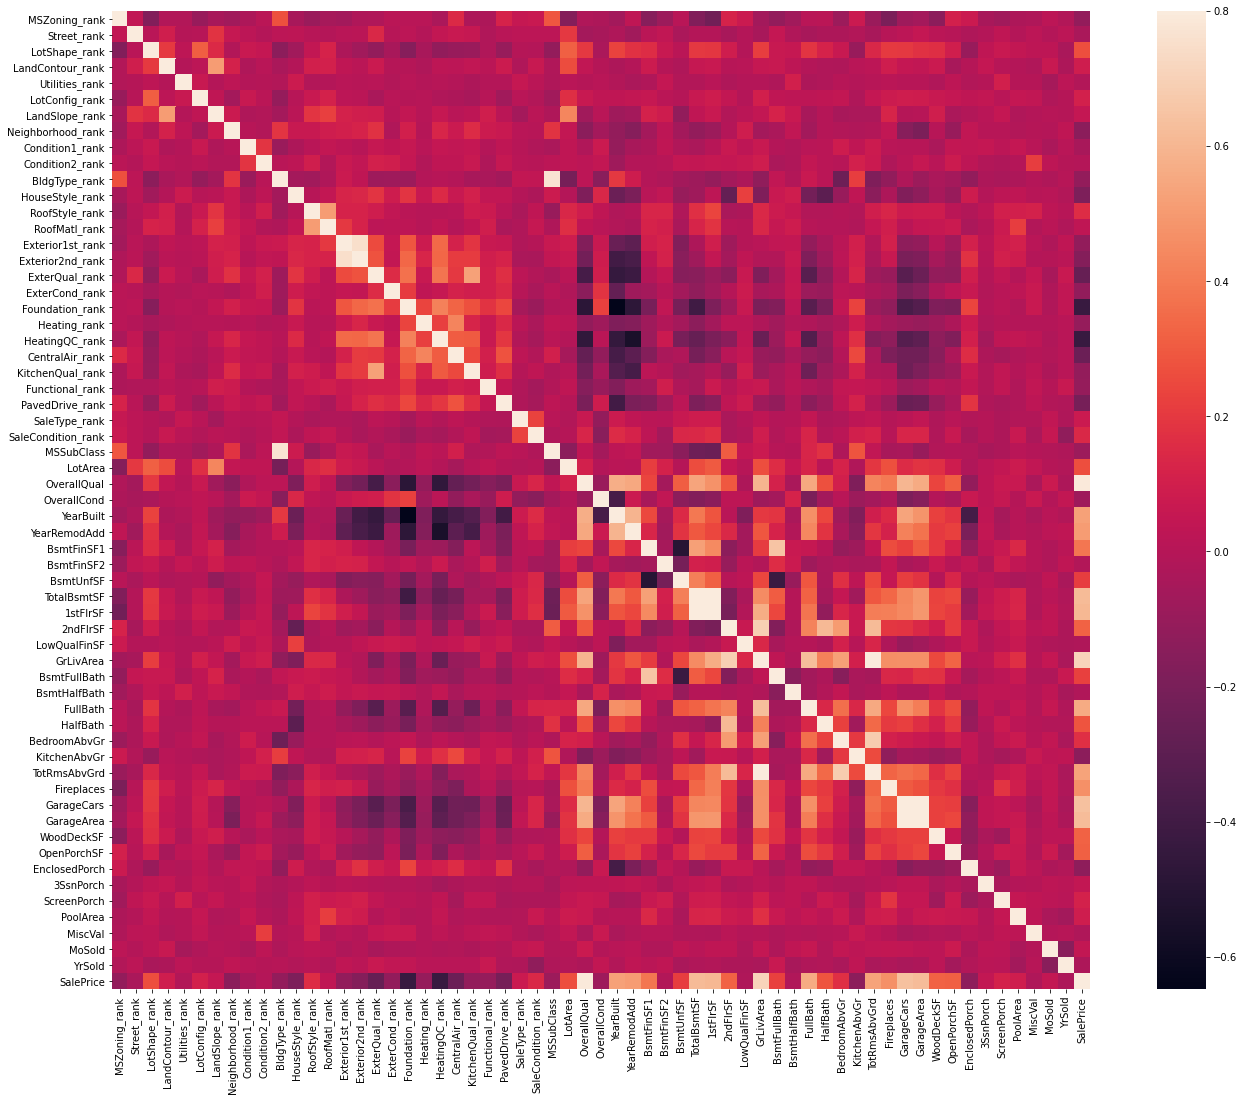

In [40]:
# 저번 시간에는 숫자형에 대해 corrmat을 구해서 상관관계를 분석했는데,
# 이제는 분류형까지 숫자로 표현되어 전체를 correlation으로 뽑아보려 한다.
corrmat = df_processed.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, vmax=.8, square=True)

In [41]:
# correlation 값을 기준으로 정렬
df_features = corrmat.sort_values(by=['SalePrice'])['SalePrice']
df_features[-40:]

YrSold               -0.028923
LowQualFinSF         -0.025606
MiscVal              -0.021190
BsmtHalfBath         -0.016844
Utilities_rank       -0.014314
BsmtFinSF2           -0.011378
Condition2_rank      -0.004833
RoofMatl_rank         0.035820
3SsnPorch             0.044584
MoSold                0.046432
LandSlope_rank        0.051152
SaleType_rank         0.072896
LandContour_rank      0.092009
PoolArea              0.092404
LotConfig_rank        0.109106
ScreenPorch           0.111447
SaleCondition_rank    0.142503
RoofStyle_rank        0.159332
BedroomAbvGr          0.168213
BsmtUnfSF             0.214479
BsmtFullBath          0.227122
LotArea               0.263843
LotShape_rank         0.267759
HalfBath              0.284108
OpenPorchSF           0.315856
2ndFlrSF              0.319334
WoodDeckSF            0.324413
BsmtFinSF1            0.386420
Fireplaces            0.466929
YearRemodAdd          0.507101
YearBuilt             0.522897
TotRmsAbvGrd          0.533723
FullBath

# AI Learning 07 - 1. Linear Regression

### Train test split

In [42]:
# training set과 validation set을 나누기 위해서 train_test_split 함수를 호출한다.
from sklearn.model_selection import train_test_split

In [43]:
# feature들 중에서 SalePrice와 상관관계가 높은 feature 15개를 추출했다.
df_features[-16:-1].index.tolist()

['OpenPorchSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'Fireplaces',
 'YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual']

In [44]:
# 위의 feature들의 값들을 X에 넣어주고, SalePrice의 값을 y에 넣어준다.
X = df_processed[df_features[-16:-1].index.tolist()]
y = df_processed['SalePrice']

In [45]:
X.shape, y.shape

((1460, 15), (1460,))

In [46]:
# train_test_split()을 호출해서 90%로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [47]:
# X_train과 X_test가 9:1의 비율로 나누어졌다.
X_train.shape, X_test.shape

((1314, 15), (146, 15))

In [48]:
# y_train과 y_test가 9:1의 비율로 나누어졌다.
y_train.shape, y_test.shape

((1314,), (146,))

### Linear Regression

In [49]:
# Lasso는 사이킷런의 linear model에 들어있다.
from sklearn.linear_model import Lasso

In [50]:
model = Lasso()

In [51]:
# data 사이즈가 얼마 안되기 때문에 학습하는데 금방 끝이 난다.
model = model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 809534762218.5767, tolerance: 787334624.1028306
  positive)


In [52]:
# prediction을 할 땐 test set을 사용한다.
pred = model.predict(X_test)

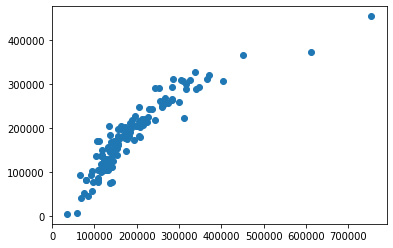

In [53]:
# prediction해서 나온 값과 실제 정답(y_test)의 상관관계 시각화
# 어느 정도는 경향성을 찾았다는 것을 알 수 있다.
plt.scatter(y_test, pred)

### Evaluation

In [54]:
from sklearn import metrics

In [55]:
# 정확히 어떤 정도로 맞췄는지 정량화하기 위해서 간단한 평가 함수를 만든다.
# 이미 mean_absolute_error()와 mean_squared_error()가 있으므로 출력만 해주는 함수를 만든다.
def print_evaluate(true, predicted):
  mae = metrics.mean_absolute_error(true, predicted)
  mse = metrics.mean_squared_error(true, predicted)
  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
  r2_square = metrics.r2_score(true, predicted)
  print('MAE: ', mae)
  print('MSE: ', mse)
  print('RMSE: ', rmse)
  print('R2 Square: ', r2_square)

In [56]:
# 예측했던 pred와 정답인 y_test를 평가한 값 출력
print_evaluate(y_test, pred)

MAE:  23794.14269597338
MSE:  1754358902.586029
RMSE:  41885.06777583186
R2 Square:  0.80798642166732


In [57]:
# 숫자가 크다보니 값을 보기 위해 table로 만들었음
df_results = pd.concat([y_test.reset_index(), pd.DataFrame(pred)], axis=1)

In [58]:
# 맨 오른쪽 column이 예측값이다.
# 대체적으로 어느 정도는 가격을 맞히는 모델이 나왔다.
df_results

,index,SalePrice,0
0,892,154500,155918.012756
1,1105,325000,308343.211554
2,413,115000,109925.280172
3,522,159000,176015.061794
4,1036,315500,299781.721455
...,...,...,...
141,526,132000,119118.906907
142,101,178000,185965.751837
143,1092,136500,183903.421321
144,411,145000,140071.706967


### Label transformation

In [59]:
# 간단히 튜닝을 하기 위한 작업
import scipy.stats as st

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


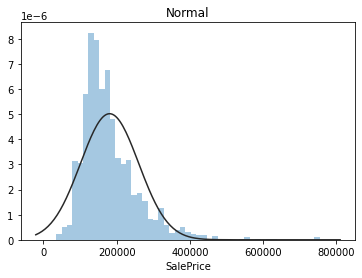

In [60]:
# output의 범위가 적은 것이 좋고, 분포가 정규분포를 따랐을 때 fitting이 잘 되는 특성이 있다.
# 그러므로 Label이 정규분포를 따르는지 확인을 해보는 것이다.
# 분포가 완전히 일치하지 않는 것을 확인할 수 있다.
plt.figure(2); plt.title('Normal')
sns.distplot(df_processed['SalePrice'], kde=False, fit=st.norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


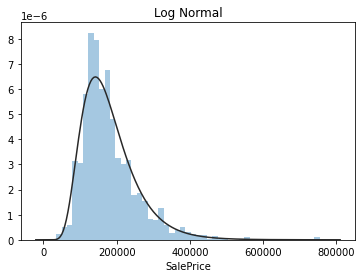

In [61]:
# Log normal을 취하면 분포가 굉장히 일치하게 된다.
plt.figure(3); plt.title('Log Normal')
sns.distplot(df_processed['SalePrice'], kde=False, fit=st.lognorm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


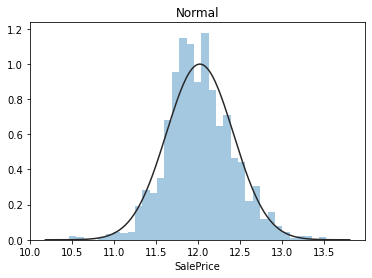

In [62]:
# 위에서 힌트를 얻어서 y값에 Log를 취한 값을 정규분포를 따르는지 보면,
# 아래와 같이 정규분포 곡선과 로그를 취한 값이 굉장히 일치하는 것을 알 수 있다.
plt.figure(3); plt.title('Normal')
sns.distplot(np.log(df_processed['SalePrice']), kde=False, fit=st.norm)

In [63]:
# X 값은 그대로 들어가는데 y값은 log를 취해서 넣겠다.
model = Lasso()
model = model.fit(X_train, np.log(y_train))

In [64]:
# 그냥 prediction을 하면 log를 취한 것이 나오니까, 원상복귀 시켜주기 위한 코드
# => exponential을 취해주면 된다.
pred = np.exp(model.predict(X_test))

In [65]:
# MAE가 23794에서 21617로 많이 감소했다.
# data feature 엔지니어링을 한다는 것은 스케일을 맞추고, 분포를 바꾸고하는 등의 과정들을 의미한다.
# 이런 과정만 거쳐도 accuracy가 확확 바뀔 수 있기 때문에, 내가 넣는 데이터가 어떤 범위에 있는지, 어떤 분포를 따르는지 항상 체크하는 것이 중요하다.
print_evaluate(y_test, pred)

MAE:  21617.328358371098
MSE:  1345501205.1928196
RMSE:  36681.07420990857
R2 Square:  0.8527356627659387


# AI Learning 07 - 2. MLP training(1)

## MLP

### Data Preprocessing

가장 먼저 고려해야할 점은 feature 별로 봤을 때, 숫자의 범위가 굉장히 제각각이다.<br>
feature 별로 scale을 normalize하는 작업이 필요하다.<br>
이 작업이 있을 때와 없을 때의 성능 차이도 있고, 있을 때 학습이 더 잘 되는 경향이 있다.

In [66]:
# feature 30개를 가져와서 작업한다.
# X 값은 'SalePrice'를 제외한 feature 30개를 가져옴
# y 값은 'SalePrice'를 가져옴
X = df_processed[df_features[-31:-1].index.tolist()]
y = df_processed['SalePrice']

In [67]:
X

,MoSold,LandSlope_rank,SaleType_rank,LandContour_rank,PoolArea,LotConfig_rank,ScreenPorch,SaleCondition_rank,RoofStyle_rank,BedroomAbvGr,BsmtUnfSF,BsmtFullBath,LotArea,LotShape_rank,HalfBath,OpenPorchSF,2ndFlrSF,WoodDeckSF,BsmtFinSF1,Fireplaces,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,2,1,1,1,0,1,0,1,1,3,150,1,8450,1,1,61,854,0,706,0,2003,2003,8,2,856,856,548,2,1710,7
1,5,1,1,1,0,2,0,1,1,3,284,0,9600,1,0,0,0,298,978,1,1976,1976,6,2,1262,1262,460,2,1262,6
2,9,1,1,1,0,1,0,1,1,3,434,1,11250,2,1,42,866,0,486,1,2002,2001,6,2,920,920,608,2,1786,7
3,2,1,1,1,0,3,0,2,1,3,540,1,9550,2,0,35,756,0,216,1,1970,1915,7,1,961,756,642,3,1717,7
4,12,1,1,1,0,2,0,1,1,4,490,1,14260,2,1,84,1053,192,655,1,2000,2000,9,2,1145,1145,836,3,2198,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,8,1,1,1,0,1,0,1,1,3,953,0,7917,1,1,40,694,0,0,1,2000,1999,7,2,953,953,460,2,1647,6
1456,2,1,1,1,0,1,0,1,1,3,589,1,13175,1,0,0,0,349,790,2,1988,1978,7,2,2073,1542,500,2,2073,6
1457,5,1,1,1,0,1,0,1,1,4,877,0,9042,1,0,60,1152,0,275,2,2006,1941,9,2,1188,1152,252,1,2340,7
1458,4,1,1,1,0,1,0,1,2,2,0,1,9717,1,0,0,0,366,49,0,1996,1950,5,1,1078,1078,240,1,1078,5


In [68]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [69]:
# train_test_split을 해준다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [70]:
# normalize를 하는 방법은 다양하지만, 쉽게 많이 접근하는 것이 최댓값과 최솟값으로 scaling하는 것이다.
# 이 과정을 거치면 column의 범위가 0에서부터 1이 된다.

from sklearn.preprocessing import MinMaxScaler

In [71]:
# column의 min 값과 column의 max 값을 구하면 column 전체를 의미한다.
# x에 min이 들어가면 결과가 0이 되고, max가 들어가면 결과가 1이 된다.
# 따라서 column의 범위가 0에서 1이 된다.
# x = (x - min(column)) / (max(column) - min(column))

# column 별로 min과 max가 다르기 때문에 쉽게 하기 위해 사이킷런에 준비된 클래스를 사용할 것이다.
min_max_scaler = MinMaxScaler()

In [73]:
# min_max_scaler.fit()을 하게 되면 x_train의 column별로 최대 최소값을 저장한다.
min_max_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [74]:
# transform()을 사용하면 특정 행렬의 scale을 fitting한 최대최소 값에 따라 바꾸게 된다.
scaled_X_train = min_max_scaler.transform(X_train)

In [75]:
# X_test도 똑같이 scaling을 해준다.
scaled_X_test = min_max_scaler.transform(X_test)

#### y값 scaling

In [76]:
y_min_max_scaler = MinMaxScaler()

In [77]:
# 위에서는 min_max_scaler에 X_train을 바로 넣어줬다.
# 하지만 이게 작동할 수 있었던 이유는 X_train의 shape은 1314x30의 행렬인데,
# y_train의 shape은 그냥 1314이다.
X_train.shape

(1314, 30)

In [78]:
# 0번째 axis는 있는데, 1번째 axis가 없다.
y_train.shape

(1314,)

In [79]:
# 이러면 api의 설계상 작동하지 않기 때문에 shape을 1314x1로 reshape을 해줘야 fitting이 된다.
# 따라서 reshape을 해준 상태로 fit에 넣어줘야 한다.
y_min_max_scaler.fit(np.array(y_train).reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [80]:
# y_train scaling
scaled_y_train = y_min_max_scaler.transform(np.array(y_train).reshape(-1, 1))

In [81]:
# y_test scaling
scaled_y_test = y_min_max_scaler.transform(np.array(y_test).reshape(-1, 1))

In [82]:
# scaling된 X_train과 X_test의 shape
scaled_X_train.shape, scaled_X_test.shape

((1314, 30), (146, 30))

In [83]:
# scaling된 y_train과 y_test의 shape
scaled_y_train.shape, scaled_y_test.shape

((1314, 1), (146, 1))

### MLP model architecture

In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [91]:
# 간단한 모델을 우선 한번 만들어보자.
# Input에 input으로 받는 feature size를 넣어준다.
# output size는 1로 해주고, regularizer는 overfitting을 방지하기 위해 사용한다.
# regularizer로 l1을 사용했기 때문에 Lasso와 거의 동일한 형태가 된다.
# lambda의 값은 0.01이다. (keras의 기본값도 0.01)
model = keras.Sequential(
    [
        keras.Input(shape=scaled_X_train.shape[-1]),
        layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.01))
    ]
)

In [92]:
# parameter 수가 31이 되는 이유는 weight가 30이고 bias가 1이라서 31이 된다.
# y = Xw + b
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [93]:
# loss는 mean squared error로 주고, optimizer는 adam으로 함.
model.compile(loss="mse", optimizer="adam")

In [94]:
# fit을 하면 loss가 점점 줄어든다.
model.fit(scaled_X_train, scaled_y_train, batch_size=1, epochs=100)

Epoch 1/100
1314/1314 [==============================] - 1s 816us/step - loss: 0.0757
Epoch 2/100
1314/1314 [==============================] - 1s 833us/step - loss: 0.0184
Epoch 3/100
1314/1314 [==============================] - 1s 896us/step - loss: 0.0107
Epoch 4/100
1314/1314 [==============================] - 1s 838us/step - loss: 0.0096
Epoch 5/100
1314/1314 [==============================] - 1s 900us/step - loss: 0.0094
Epoch 6/100
1314/1314 [==============================] - 1s 835us/step - loss: 0.0093
Epoch 7/100
1314/1314 [==============================] - 1s 851us/step - loss: 0.0093
Epoch 8/100
1314/1314 [==============================] - 1s 865us/step - loss: 0.0093
Epoch 9/100
1314/1314 [==============================] - 1s 850us/step - loss: 0.0092
Epoch 10/100
1314/1314 [==============================] - 1s 861us/step - loss: 0.0093
Epoch 11/100
1314/1314 [==============================] - 1s 852us/step - loss: 0.0092
Epoch 12/100
1314/1314 [============================

In [95]:
# predict를 할땐 test set을 넣어야한다.
# 그런데 학습할 때 scale된 값을 넣었으니, predict할때도 scale된 test set을 넣어야 한다.
scaled_pred = model.predict(scaled_X_test)

In [96]:
# 그럼 scale이 변형된 predict값이 나온다.
# 이걸 우리가 평가를 하려면 원래 scale로 되돌려야한다.
# 이때 사용하는 것이 inverse_transform이다.
pred_y = y_min_max_scaler.inverse_transform(scaled_pred)

In [97]:
print_evaluate(y_test, pred_y)

MAE:  37847.03403253425
MSE:  4155276741.7544723
RMSE:  64461.436082005435
R2 Square:  0.5452073375802817


### Add layers

In [109]:
# 방금까지 굉장히 간단한 모델을 학습시켰다.
# 여기서 더 할 수 있는 것은 깊이를 깊게 하거나 (hidden layer를 늘리겠다는 뜻)
# feature의 size를 늘릴 수도 있다. (weight들을 많이 쓰겠다는 뜻)

# 우리가 할 것은 hidden layer를 넣는 것이다.

# activation을 사용하지 않으면 그냥 선형 모델이 되기 때문에
# 조금 더 복잡한 문제를 풀기 위해 non-linearity를 주려고 activation을 사용했다.

model = keras.Sequential(
    [
        keras.Input(shape=scaled_X_train.shape[-1]),
        layers.Dense(96, activation='relu'),
        layers.Dense(48, activation='relu'),
        layers.Dense(1)
    ]
)

In [110]:
# 학습 데이터가 어마어마하게 커짐
# 31 -> 7681
# input에 비해 너무 많은 양이라 overfitting이 발생할 가능성이 높다.
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 96)                2976      
_________________________________________________________________
dense_7 (Dense)              (None, 48)                4656      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 49        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(loss="mse", optimizer="adam")

In [112]:
# loss가 계속 떨어진다는 것은 어떤 시점 이후로 overfitting이 발생하고 있다라고 생각하면 된다.
# 이럴 땐 validation set을 설정하여 overfitting이 되고 있는지 아닌지 체크해줄 필요가 있다.
# 뒤에 validation_split을 넣어주면 overfit이 나는지 아닌지 확인해준다.

# 이때 validation loss가 어느 시점 이후로 증가하거나,
# loss와 validation loss가 차이가 많이 나면
# overfitting이 진행되고 있는 것이므로 학습을 중단시켜야 한다.

model.fit(scaled_X_train, scaled_y_train, batch_size=2, epochs=100, validation_split=0.05)

Epoch 1/100
624/624 [==============================] - 1s 1ms/step - loss: 0.0068 - val_loss: 0.0034
Epoch 2/100
624/624 [==============================] - 1s 1ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 3/100
624/624 [==============================] - 1s 1ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 4/100
624/624 [==============================] - 1s 1ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 5/100
624/624 [==============================] - 1s 1ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 6/100
624/624 [==============================] - 1s 1ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 7/100
624/624 [==============================] - 1s 1ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 8/100
624/624 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 9/100
624/624 [==============================] - 1s 1ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 10/100
624/624 [==============================] - 1s 1ms/step - loss: 0.0021 - val_lo

In [113]:
scaled_pred = model.predict(scaled_X_test)
pred_y = y_min_max_scaler.inverse_transform(scaled_pred)

In [114]:
print_evaluate(y_test, pred_y)

MAE:  20203.42615582192
MSE:  864479580.8491796
RMSE:  29402.033617577876
R2 Square:  0.9053832043889626


### Early-stopping

In [122]:
# 데이터의 양이 많을 땐 우리가 직접 보고 학습을 중단시킬 수 없기 때문에
# 알아서 어느 시점에 꺼지도록 하는 방법이 early-stopping 기능이다.
model = keras.Sequential(
    [
        keras.Input(shape=scaled_X_train.shape[-1]),
        layers.Dense(96, activation='relu'),
        layers.Dense(48, activation='relu'),
        layers.Dense(1)
    ]
)
model.compile(loss="mse", optimizer="adam")

In [123]:
# patience 수 만큼 학습을 하면서 validation loss가 줄지 않으면 학습을 중단시킨다. 
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

In [124]:
model.fit(scaled_X_train, scaled_y_train, batch_size=2, epochs=150, validation_split=0.1, callbacks=[callback])

Epoch 1/150
591/591 [==============================] - 1s 1ms/step - loss: 0.0042 - val_loss: 0.0022
Epoch 2/150
591/591 [==============================] - 1s 1ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 3/150
591/591 [==============================] - 1s 1ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 4/150
591/591 [==============================] - 1s 1ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 5/150
591/591 [==============================] - 1s 1ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 6/150
591/591 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 0.0045
Epoch 7/150
591/591 [==============================] - 1s 1ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 8/150
591/591 [==============================] - 1s 1ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 9/150
591/591 [==============================] - 1s 1ms/step - loss: 0.0017 - val_loss: 9.4031e-04
Epoch 10/150
591/591 [==============================] - 1s 1ms/step - loss: 0.0023 - va